In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('transactional-sample.csv', parse_dates=['transaction_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      3199 non-null   int64         
 1   merchant_id         3199 non-null   int64         
 2   user_id             3199 non-null   int64         
 3   card_number         3199 non-null   object        
 4   transaction_date    3199 non-null   datetime64[ns]
 5   transaction_amount  3199 non-null   float64       
 6   device_id           2369 non-null   float64       
 7   has_cbk             3199 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 178.2+ KB


In [5]:
df.isnull().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [6]:
df_user_id = df.groupby('user_id')['card_number'].nunique()
df_user_id = df_user_id.reset_index().rename(columns={'card_number': 'num_cards'})
df_user_id = df_user_id.sort_values(by='num_cards', ascending=False)
df_user_id

,user_id,num_cards
302,11750,31
2448,91637,22
2103,79054,15
2085,78262,10
2582,96025,10
...,...,...
924,34989,1
925,35083,1
926,35108,1
927,35138,1


In [7]:
df_cbk_count = df.groupby('user_id')['has_cbk'].sum()
df_cbk_count = df_cbk_count.reset_index().rename(columns={'has_cbk': 'cbk_count'})
df_cbk_count = df_cbk_count.sort_values(by='cbk_count', ascending=False)
df_cbk_count

,user_id,cbk_count
302,11750,25
2448,91637,19
2103,79054,15
2582,96025,13
2085,78262,12
...,...,...
930,35315,0
931,35318,0
932,35362,0
933,35422,0


In [8]:
merge_df = pd.merge(df_user_id, df_cbk_count, on='user_id')
merge_df

,user_id,num_cards,cbk_count
0,11750,31,25
1,91637,22,19
2,79054,15,15
3,78262,10,12
4,96025,10,13
...,...,...,...
2699,34989,1,0
2700,35083,1,0
2701,35108,1,0
2702,35138,1,2


In [9]:
df_cbk_only = df[df.has_cbk == True]
df_not_cbk = df[df.has_cbk == False]
df_cbk_only

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
7,21320405,56107,81152,650516******9201,2019-12-01 21:24:05.608374,188.68,486.0,True
8,21320406,56107,81152,650516******9201,2019-12-01 21:13:21.529999,352.77,486.0,True
9,21320407,56107,81152,650516******9201,2019-12-01 21:04:55.066909,345.68,486.0,True
...,...,...,...,...,...,...,...,...
3157,21323555,41354,19820,606282******6581,2019-11-02 18:04:22.088172,4028.55,NaN,True
3165,21323563,41354,19820,606282******6581,2019-11-02 16:33:21.333131,4031.00,NaN,True
3178,21323576,16266,96495,522840******2045,2019-11-01 22:10:49.517024,762.18,NaN,True
3180,21323578,16266,96495,552305******4782,2019-11-01 20:54:04.014855,2936.66,NaN,True


In [10]:
df_cbk_only['time'] = df_cbk_only['transaction_date'].dt.hour
df_not_cbk['time'] = df_not_cbk['transaction_date'].dt.hour
df_cbk_only

C:\Users\55459\AppData\Local\Temp\ipykernel_8836\1539666471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cbk_only['time'] = df_cbk_only['transaction_date'].dt.hour
C:\Users\55459\AppData\Local\Temp\ipykernel_8836\1539666471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_cbk['time'] = df_not_cbk['transaction_date'].dt.hour


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,time
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,22
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True,21
7,21320405,56107,81152,650516******9201,2019-12-01 21:24:05.608374,188.68,486.0,True,21
8,21320406,56107,81152,650516******9201,2019-12-01 21:13:21.529999,352.77,486.0,True,21
9,21320407,56107,81152,650516******9201,2019-12-01 21:04:55.066909,345.68,486.0,True,21
...,...,...,...,...,...,...,...,...,...
3157,21323555,41354,19820,606282******6581,2019-11-02 18:04:22.088172,4028.55,NaN,True,18
3165,21323563,41354,19820,606282******6581,2019-11-02 16:33:21.333131,4031.00,NaN,True,16
3178,21323576,16266,96495,522840******2045,2019-11-01 22:10:49.517024,762.18,NaN,True,22
3180,21323578,16266,96495,552305******4782,2019-11-01 20:54:04.014855,2936.66,NaN,True,20


In [13]:
df2 = pd.read_csv('minutes-diff.csv')
df2.head()

,card_number,t1_tx_id,t2_tx_id,t1_tx_date,t2_tx_date,t1_tx_amount,t2_tx_amount,has_cbk,minutes_difference
0,527468******1757,21321502,21321501,2019-11-27 14:52:06.001713 UTC,2019-11-27 14:52:55.108583 UTC,471.06,278.03,True,0
1,545368******9514,21320546,21320545,2019-12-01 01:07:05.370126 UTC,2019-12-01 01:07:42.861959 UTC,566.98,582.63,True,0
2,415944******1540,21321363,21321362,2019-11-28 15:40:42.787730 UTC,2019-11-28 15:41:40.107253 UTC,334.46,553.66,True,0
3,554482******7640,21323328,21323327,2019-11-08 23:14:35.977303 UTC,2019-11-08 23:15:05.322183 UTC,386.82,599.13,True,0
4,554482******7640,21323330,21323329,2019-11-08 23:11:18.971808 UTC,2019-11-08 23:12:00.465991 UTC,320.96,254.37,True,0


Text(0, 0.5, 'Frequency')

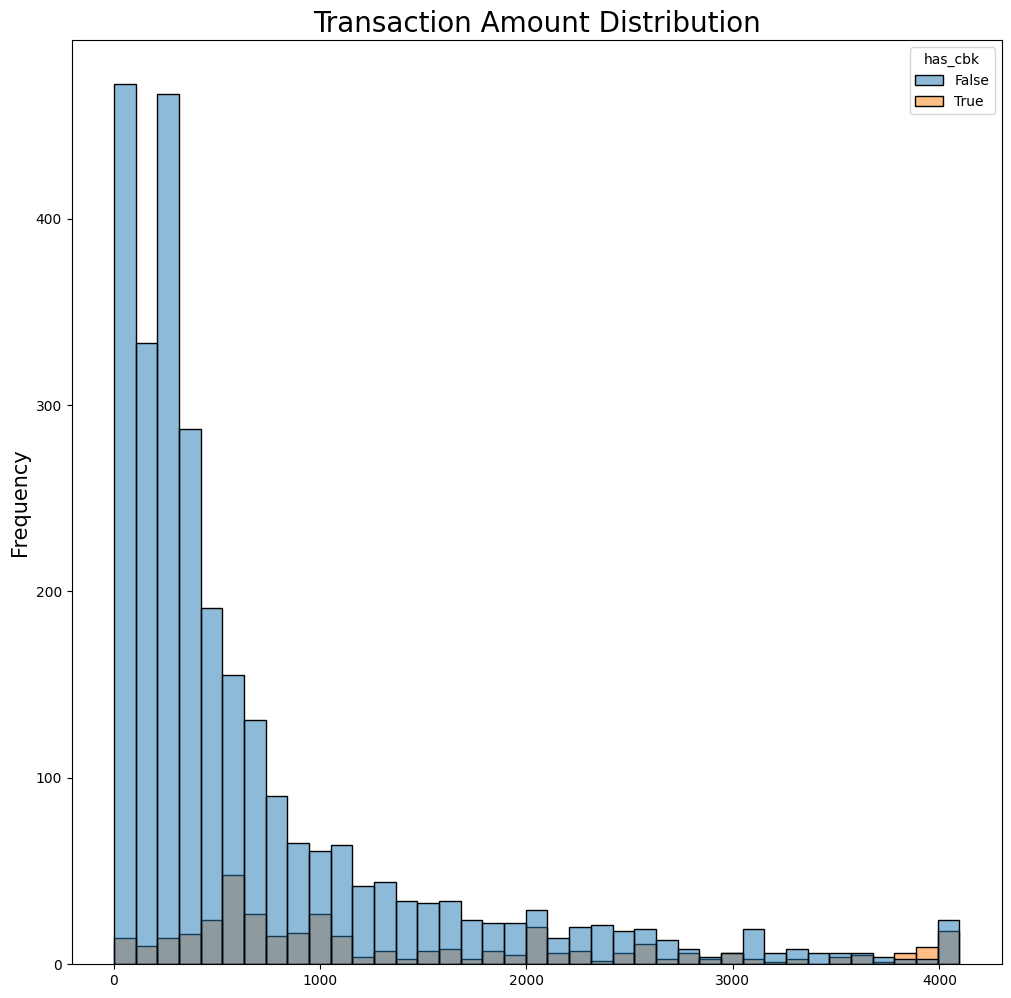

<Figure size 2000x300 with 0 Axes>

In [17]:
fig, axes = plt.subplots(1, figsize=(12, 12));
color=sns.color_palette("hls", 8)[3]

plt.figure(figsize=(20,3))

sns.histplot(x="transaction_amount", data=df, color=color, ax=axes, hue='has_cbk');
axes.tick_params(labelsize=10)
axes.set_title('Transaction Amount Distribution', fontsize=20)
axes.set_xlabel('', fontsize=15)
axes.set_ylabel('Frequency', fontsize=15)

In [18]:
data = df.copy()
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['transaction_hour'] = data['transaction_date'].dt.hour
data['transaction_weekday'] = data['transaction_date'].dt.day_name()
data['transaction_weekday_number'] = data['transaction_date'].dt.weekday
data.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_hour,transaction_weekday,transaction_weekday_number
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False,23,Sunday,6
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,22,Sunday,6
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False,22,Sunday,6
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True,21,Sunday,6
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False,21,Sunday,6


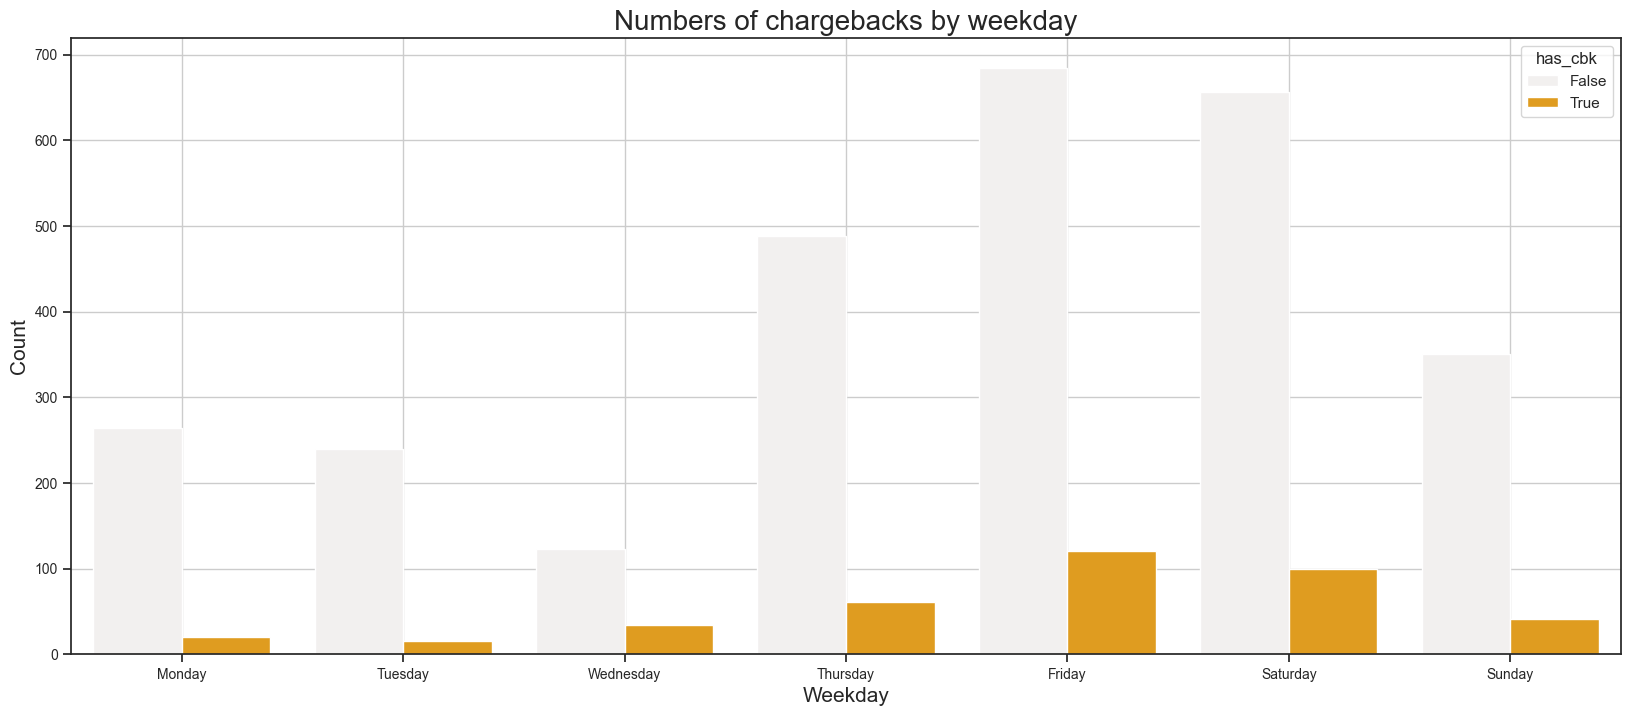

In [19]:
plt.figure(figsize=(20,8))

sns.set(style="ticks")
ax = sns.countplot(x="transaction_weekday", data=data.sort_values('transaction_weekday_number'), color="orange", hue='has_cbk')
ax.tick_params(labelsize=10)
ax.grid()
ax.set_title('Numbers of chargebacks by weekday', fontsize=20)
ax.set_xlabel('Weekday', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=0)
plt.show()

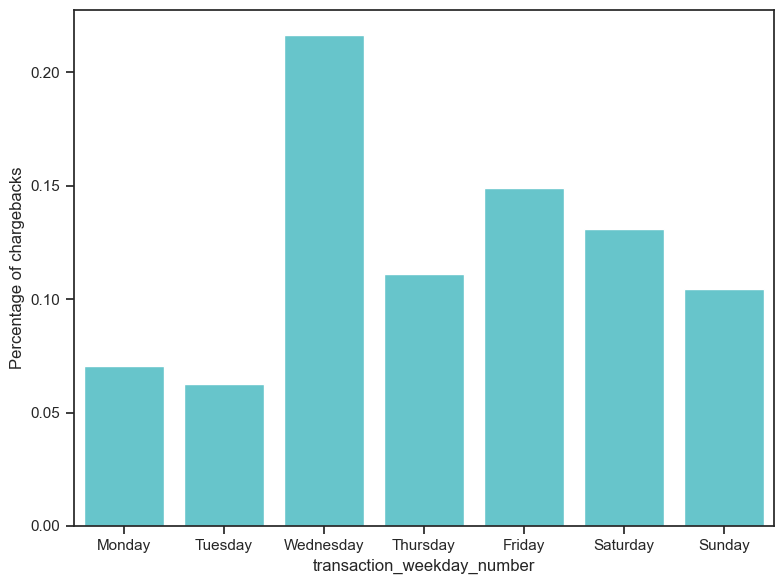

In [44]:
chargeback_pct2 = data.groupby('transaction_weekday_number')['has_cbk'].mean()
plt.figure(figsize=(8, 6))
color=sns.color_palette("hls", 6)[3]
ax = sns.barplot(x=chargeback_pct2.index, y=chargeback_pct2.values, color=color)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_ylabel('Percentage of chargebacks')
plt.tight_layout()
plt.show()